In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer

%matplotlib inline


# Selecting the number of clusters with silhouette analysis on KMeans clustering

Silhouette analysis can be used to study the separation distance between the
resulting clusters. The silhouette plot displays a measure of how close each
point in one cluster is to points in the neighboring clusters and thus provides
a way to assess parameters like number of clusters visually. This measure has a
range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate
that the sample is far away from the neighboring clusters. A value of 0
indicates that the sample is on or very close to the decision boundary between
two neighboring clusters and negative values indicate that those samples might
have been assigned to the wrong cluster.

In this example the silhouette analysis is used to choose an optimal value for
``n_clusters``. The silhouette plot shows that the ``n_clusters`` value of 3, 5
and 6 are a bad pick for the given data due to the presence of clusters with
below average silhouette scores and also due to wide fluctuations in the size
of the silhouette plots. Silhouette analysis is more ambivalent in deciding
between 2 and 4.

Also from the thickness of the silhouette plot the cluster size can be
visualized. The silhouette plot for cluster 0 when ``n_clusters`` is equal to
2, is bigger in size owing to the grouping of the 3 sub clusters into one big
cluster. However when the ``n_clusters`` is equal to 4, all the plots are more
or less of similar thickness and hence are of similar sizes as can be also
verified from the labelled scatter plot on the right.


In [2]:
sns.set(rc={"figure.dpi":120, 'savefig.dpi':120})

In [3]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=3,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

In [4]:
df_ex = pd.DataFrame(data=X, columns=['x', 'y'])
df_ex['label'] = y

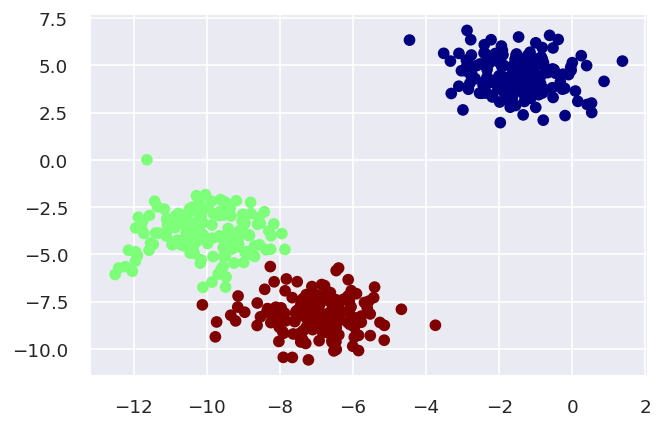

In [5]:
fig, ax = plt.subplots()
ax.scatter(df_ex['x'], df_ex['y'], c=df_ex['label'], cmap='jet')

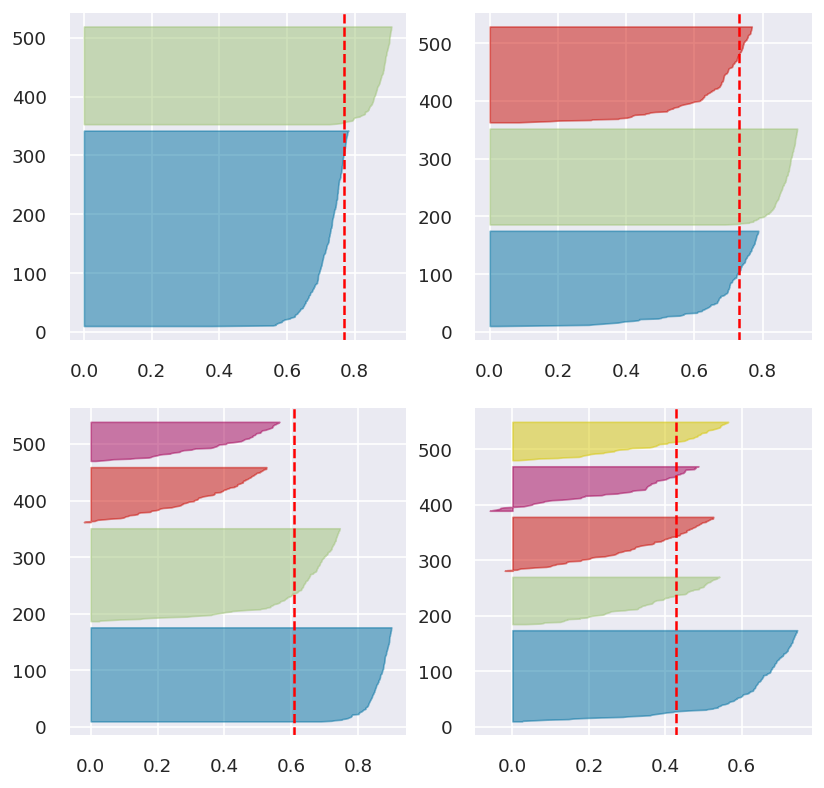

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
centers = np.arange(2, 6)
for idx, ax in enumerate(axs.flat):
    '''
    Create KMeans instance for different number of clusters
    '''
    try:
        km = KMeans(n_clusters=centers[idx]) # , init='k-means++', n_init=10, max_iter=100, random_state=42)
        '''
        Create SilhouetteVisualizer instance with KMeans instance
        Fit the visualizer
        '''
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax)
        visualizer.fit(X)
    except IndexError:
        pass

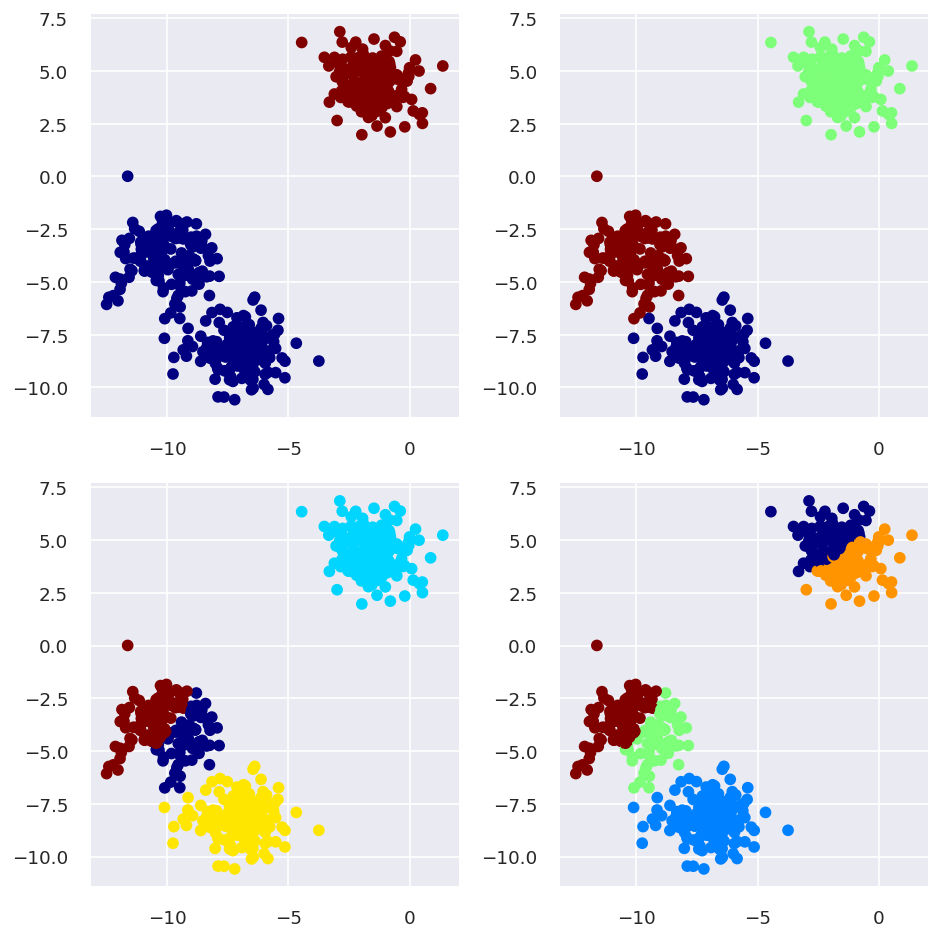

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
centers = np.arange(2, 6)
for idx, ax in enumerate(axs.flat):
    '''
    Create KMeans instance for different number of clusters
    '''
    try:
        km = KMeans(n_clusters=centers[idx]) # , init='k-means++', n_init=10, max_iter=100, random_state=42)
        km.fit(X)
        labels= km.labels_
        ax.scatter(df_ex['x'], df_ex['y'], c=labels, cmap='jet')
    except IndexError:
        pass
plt.tight_layout()